In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
x = iris.drop(columns="species",axis=1)
y = iris["species"]


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [5]:
matriz_cov = np.cov(x.T)
matriz_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [6]:
eigvalue, eigvector = np.linalg.eig(matriz_cov)
print(eigvalue)
print(eigvector)

[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [7]:
varianza_explicada = []
varianza_explicada_acum = []
varianza_acum = 0

for i in eigvalue:
  varianza = (i/sum(eigvalue))*100
  varianza_acum += varianza
  varianza_explicada.append(varianza)
  varianza_explicada_acum.append(varianza_acum)

print(varianza_explicada)
print(varianza_explicada_acum)




[72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]
[72.9624454132999, 95.81320720000163, 99.4821290892845, 100.0]


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(x)

PCA(n_components=1)

In [9]:
#print(pca.components_)
#print(pca.explained_variance_)
#print(pca.explained_variance_ratio_)

In [10]:
X_PCA = pca.transform(x)

In [11]:
X_PCA

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217],
       [-2.07563095],
       [-2.44402884],
       [-2.23284716],
       [-2.33464048],
       [-2.18432817],
       [-2.1663101 ],
       [-2.32613087],
       [-2.2184509 ],
       [-2.6331007 ],
       [-2.1987406 ],
       [-2.26221453],
       [-2.2075877 ],
       [-2.19034951],
       [-1.898572  ],
       [-2.34336905],
       [-1.914323  ],
       [-2.20701284],
       [-2.7743447 ],
       [-1.81866953],
       [-2.22716331],
       [-1.95184633],
       [-2.05115137],
       [-2.16857717],
       [-2.13956345],
       [-2.26526149],
       [-2.14012214],
       [-1.83159477],
       [-2.61494794],
       [-2.44617739],
       [-2.10997488],
       [-2.2078089 ],
       [-2.04514621],
       [-2.52733191],
       [-2.42963258],
       [-2.16971071],
       [-2.28647514],
       [-1.85812246],
       [-2.5536384 ],
       [-1.96444768],
       [-2.13705901],
       [-2

In [12]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(x,y)
modeloPCA = LogisticRegression()
modeloPCA.fit(X_PCA,y)

print(modelo.score(x,y)*100)
print(modeloPCA.score(X_PCA,y)*100)

97.33333333333334
92.66666666666666


# Complicarlo mas

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)
data_test = pd.read_csv('/content/sample_data/mnist_test.csv',header=None)
x = data.drop(columns=0,axis=1)
y = data[0]
x_test = data_test.drop(columns=0,axis=1)
y_test = data_test[0]
x /= 255.0
x_test /= 255.0

In [14]:
#scaler = StandardScaler()
#x = scaler.fit_transform(x)
pca = PCA(n_components=20)
X_PCA = pca.fit_transform(x)
X_PCA_test = pca.transform(x_test)

Regresion Logistica

In [15]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(x,y)
modeloPCA = LogisticRegression()
modeloPCA.fit(X_PCA,y)
print(modelo.score(x_test,y_test)*100)
print(modeloPCA.score(X_PCA_test,y_test)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


91.84
87.91


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


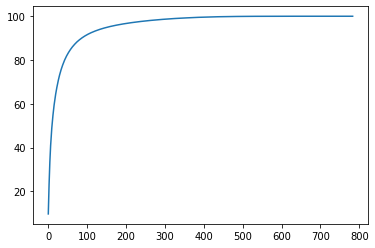

In [16]:
matriz_cov = np.cov(x.T)
eigvalue, eigvector = np.linalg.eig(matriz_cov)
varianza_explicada = []
varianza_explicada_acum = []
varianza_acum = 0

for i in eigvalue:
  varianza = (i/sum(eigvalue))*100
  varianza_acum += varianza
  varianza_explicada.append(varianza)
  varianza_explicada_acum.append(varianza_acum)

plt.plot(range(len(varianza_explicada_acum)),varianza_explicada_acum)

Con Redes Neuronales

In [19]:
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(784,)),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(10)
])
model.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
epochs=20
history = model.fit(x, y,
                     validation_data=(x_test,y_test),
                     epochs=epochs)

Epoch 1/20
625/625 [==============================] - 5s 4ms/step - loss: 1.0543 - accuracy: 0.7452 - val_loss: 0.5685 - val_accuracy: 0.8658
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 0.4898 - accuracy: 0.8751 - val_loss: 0.4176 - val_accuracy: 0.8907
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3975 - accuracy: 0.8919 - val_loss: 0.3664 - val_accuracy: 0.8970
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3553 - accuracy: 0.9021 - val_loss: 0.3373 - val_accuracy: 0.9037
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3299 - accuracy: 0.9084 - val_loss: 0.3184 - val_accuracy: 0.9108
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3111 - accuracy: 0.9115 - val_loss: 0.3064 - val_accuracy: 0.9127
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.2962 - accuracy: 0.9158 - val_loss: 0.2927 - val_accuracy: 0.9174
Epoch 

In [20]:
model2 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(20,)),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(10)
])
model2.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
epochs=20
history = model2.fit(X_PCA, y,
                     validation_data=(X_PCA_test,y_test),
                     epochs=epochs)

Epoch 1/20
625/625 [==============================] - 3s 4ms/step - loss: 1.1851 - accuracy: 0.6651 - val_loss: 0.6616 - val_accuracy: 0.8333
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 0.5627 - accuracy: 0.8483 - val_loss: 0.4730 - val_accuracy: 0.8685
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.4470 - accuracy: 0.8719 - val_loss: 0.4044 - val_accuracy: 0.8838
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3938 - accuracy: 0.8850 - val_loss: 0.3664 - val_accuracy: 0.8925
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3604 - accuracy: 0.8936 - val_loss: 0.3398 - val_accuracy: 0.8998
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3363 - accuracy: 0.9008 - val_loss: 0.3210 - val_accuracy: 0.9055
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3173 - accuracy: 0.9064 - val_loss: 0.3052 - val_accuracy: 0.9105
Epoch 